Authorise in twitter

In [1]:
import tweepy
from tweepy import OAuthHandler

In [2]:
import nltk

In [3]:
import re

In [4]:

import pandas as pd
import numpy as np

In [5]:
import os

In [6]:

import sys
import os
import time

In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

In [8]:
##classes = ['pos', 'neg']


In [9]:
from textblob import TextBlob

In [9]:
import random

Class constructor or initialization method.

In [11]:
consumer_key = 'zow0fQ6Lv0j79gx4lDhBKVUDu'
consumer_secret = 'fp33fr0VBkIIoPzpwgbCPemkZJ1E718TFqb8b86DKd0nVgGFEs'
access_token = '836598863582617600-Tjmc0MqCtcOZVjx9dto5wSBkdRgxDmh'
access_secret = '57THIHAlttLUf3y8x1P5U2JnQmcDIfDqq8xmZrwgD5Qo6'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


Setting working directory

In [10]:
print os.getcwd();

/Users/imacair


In [11]:
os.chdir("/Users/imacair/Desktop/Products3/")

In [144]:
data_tw= pd.read_csv('Final_TW_3103.csv',
                    encoding='latin-1',delimiter=',')
#data_tw

Read the file

In [145]:
data = pd.read_csv('trainingandtestdata/training.1600000.processed.noemoticon.csv',
                   names =['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding='latin-1',delimiter=',')
#data



In [14]:
len(data)

1600000

Take a sample from data

In [34]:
sample_data= data.sample(n=10000)

In [35]:
#sample_data= data[215:218]

In [36]:
data_t=sample_data["text"]

In [37]:
type(data_t)

pandas.core.series.Series

In [38]:
data_s=sample_data["sentiment"]

In [146]:
data_tw_text=data_tw["Text"]
#data_tw_text

In [40]:
#data_t=data["text"]
#data_s=data["sentiment"]

In [70]:
#lowercase
data_t = data_t.str.lower()
#Remove hyperlinks
data_t= data_t.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', "")
#Remove citations
data_t = data_t.str.replace(r'@[a-zA-Z0-9]*', "")
#remove punctuation
data_t = data_t.str.replace(r'[^\w\s]',"")
#remove numbers
data_t = data_t.str.replace(r'\d+',"")
#remove _
data_t = data_t.str.replace(r'\_+',"")

In [53]:
#lowercase
#data_tw_text = data_tw_text.str.lower()
#Remove hyperlinks
#data_tw_text= data_tw_text.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '')
#Remove citations
#data_tw_text = data_tw_text.str.replace(r'@[a-zA-Z0-9]*', '')
#remove punctuation
#data_tw_text = data_tw_text.str.replace(r'[^\w\s]','')

In [54]:
#data_s = data["sentiment"]
#a = np.unique(data_s)
#a

In [55]:
#data_s

In [147]:
#data_t

Spliting the data


In [72]:
from sklearn.cross_validation import train_test_split
import numpy as np

In [73]:
data_train, data_test, label_train, label_test = train_test_split(data_t, data_s, test_size=0.33, random_state=42)

In [148]:
#data_test

In [75]:
#vectorize

In [76]:
vectorizer = TfidfVectorizer(    sublinear_tf=True,
                                 use_idf=True,stop_words = 'english')
train_vectors = vectorizer.fit_transform(data_train)
test_vectors = vectorizer.transform(data_test)

#test_vectors = vectorizer.transform(data_test)

In [77]:
#data_tw_text = data_tw_text.values.astype('U')

In [78]:
#test_vectors_tw = vectorizer.transform(data_tw_text)

In [79]:
classifier_rbf = svm.SVC()
t0 = time.time()
classifier_rbf.fit(train_vectors, label_train)
t1 = time.time()
prediction_rbf = classifier_rbf.predict(test_vectors)
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1

In [80]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, label_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [81]:
# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
t0 = time.time()
classifier_liblinear.fit(train_vectors, label_train)
t1 = time.time()
prediction_liblinear = classifier_liblinear.predict(test_vectors)
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1

In [82]:
print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(label_test, prediction_rbf))
print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(label_test, prediction_linear))
print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(label_test, prediction_liblinear))

Results for SVC(kernel=rbf)
Training time: 5.155806s; Prediction time: 1.678610s
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1687
          4       0.49      1.00      0.66      1613

avg / total       0.24      0.49      0.32      3300

Results for SVC(kernel=linear)
Training time: 4.241656s; Prediction time: 0.950697s
             precision    recall  f1-score   support

          0       0.73      0.70      0.71      1687
          4       0.70      0.73      0.71      1613

avg / total       0.71      0.71      0.71      3300

Results for LinearSVC()
Training time: 0.039026s; Prediction time: 0.000652s
             precision    recall  f1-score   support

          0       0.71      0.68      0.69      1687
          4       0.68      0.70      0.69      1613

avg / total       0.69      0.69      0.69      3300



In [ ]:
vectorizer = TfidfVectorizer(    sublinear_tf=True,
                                 use_idf=True,stop_words = 'english')
train_vectors = vectorizer.fit_transform(data_train)
test_vectors = vectorizer.transform(data_test)

Singular value decomposition and LSA

In [136]:
#pd.DataFrame(train_vectors.toarray(),columns=vectorizer.get_feature_names
#()).head(10)

,aa,aaaaaaaah,aaaah,aaaaw,aaaghhrr,aaah,aaahhh,aaahhhh,aaargh,aaawwwww,...,zombies,zombiewondering,zomfg,zone,zones,zonked,zoo,zootweetup,zzzzz,zzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
#Get the names of columns
#vectorizer.get_feature_names()

In [88]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.preprocessing import Normalizer
from sklearn import metrics

In [138]:

# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
train_vectors_lsa = lsa.fit_transform(train_vectors)
train_vectors_lsa = Normalizer(copy=False).fit_transform(train_vectors_lsa)

In [139]:
#pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =
#vectorizer.get_feature_names())

,aa,aaaaaaaah,aaaah,aaaaw,aaaghhrr,aaah,aaahhh,aaahhhh,aaargh,aaawwwww,...,zombies,zombiewondering,zomfg,zone,zones,zonked,zoo,zootweetup,zzzzz,zzzzzzzz
component_1,0.001032,0.000146,0.000030,0.000124,0.000329,0.000744,0.000291,0.000989,0.000867,0.000592,...,0.001472,0.001661,0.000147,0.003497,0.000815,0.000752,0.006412,0.001893,0.000844,0.001018
component_2,-0.000606,-0.000105,0.000009,0.000028,-0.000217,-0.000316,-0.000195,-0.000955,-0.000860,0.000299,...,-0.000768,-0.000643,-0.000037,0.008776,-0.000312,-0.000180,-0.001005,0.002075,-0.000383,0.000179


In [140]:
pd.DataFrame(train_vectors_lsa,  columns = ["component_1","component_2"
])

,component_1,component_2
0,0.962108,-0.272668
1,0.879142,0.476560
2,0.952660,0.304036
3,0.978192,-0.207704
4,0.932914,0.360099
5,0.915064,-0.403309
6,0.890286,-0.455401
7,0.935046,-0.354526
8,0.999150,-0.041230
9,0.970889,-0.239529


In [94]:
x = [w[0] for w in train_vectors_lsa]
y = [w[1] for w in train_vectors_lsa]
x, y

([0.96210830525447444,
  0.87914208007863615,
  0.95266042269785434,
  0.97819181452831971,
  0.93291406645839181,
  0.9150639498355353,
  0.89028642811969916,
  0.93504597019282021,
  0.99914966783004022,
  0.97088914995495368,
  0.9553989070673744,
  0.97552505994213168,
  0.94933442624524544,
  0.94984729692996339,
  -0.18372590139741218,
  0.98849055892518989,
  0.95170881181752054,
  0.98891465750108531,
  0.94089760958020996,
  0.91166811205552267,
  0.73159820515306784,
  0.70600036414605394,
  0.85555566940420691,
  0.9993728754010589,
  0.82784579018919557,
  0.99986771025519872,
  0.87126741671232877,
  0.80878261588599554,
  0.95824038676250645,
  0.96172919477933805,
  0.86442044026824139,
  0.89457526446835789,
  0.99377902284960018,
  0.71648431029164683,
  0.99574161122719085,
  0.91948387356020767,
  0.85932386966952778,
  0.91574935116584233,
  0.96607813912189477,
  0.94328153318714458,
  0.95853345134501089,
  0.44257390063827834,
  0.60791821101783383,
  0.968888628

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


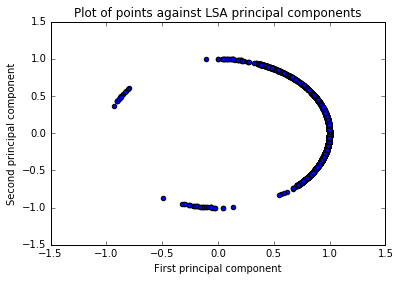

In [95]:
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(x,y)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

In [ ]:
lsa = TruncatedSVD(2, algorithm = 'arpack')
train_vectors_lsa = lsa.fit_transform(train_vectors)
train_vectors_lsa = Normalizer(copy=False).fit_transform(train_vectors_lsa)

In [111]:
data_train = data_train.values.astype('U')

In [112]:
data_test= data_test.values.astype('U')

In [124]:
svd = TruncatedSVD(200, algorithm = 'arpack')
train_vectors_lsa = lsa.fit_transform(train_vectors)
train_vectors_lsa = Normalizer(copy=False).fit_transform(train_vectors_lsa)



In [130]:
test_vectors_lsa = lsa.transform(test_vectors)
test_vectors_lsa = Normalizer(copy=False).transform(test_vectors_lsa)

In [150]:
#pd.DataFrame(train_vectors_lsa,  columns = ["component_1","component_2"
#])

In [131]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors_lsa, label_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors_lsa)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [132]:
# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
t0 = time.time()
classifier_liblinear.fit(train_vectors_lsa, label_train)
t1 = time.time()
prediction_liblinear = classifier_liblinear.predict(test_vectors_lsa)
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1

In [133]:
classifier_rbf = svm.SVC()
t0 = time.time()
classifier_rbf.fit(train_vectors_lsa, label_train)
t1 = time.time()
prediction_rbf = classifier_rbf.predict(test_vectors_lsa)
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1

In [134]:
print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(label_test, prediction_rbf))
print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(label_test, prediction_linear))
print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(label_test, prediction_liblinear))

Results for SVC(kernel=rbf)
Training time: 9.782951s; Prediction time: 3.583641s
             precision    recall  f1-score   support

          0       0.54      0.58      0.56      1687
          4       0.52      0.48      0.50      1613

avg / total       0.53      0.53      0.53      3300

Results for SVC(kernel=linear)
Training time: 7.247289s; Prediction time: 1.923575s
             precision    recall  f1-score   support

          0       0.53      0.51      0.52      1687
          4       0.51      0.53      0.52      1613

avg / total       0.52      0.52      0.52      3300

Results for LinearSVC()
Training time: 0.278160s; Prediction time: 0.001205s
             precision    recall  f1-score   support

          0       0.54      0.50      0.52      1687
          4       0.51      0.56      0.54      1613

avg / total       0.53      0.53      0.53      3300



In [100]:
import pandas as pd 
import sklearn
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import chi2

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support


In [39]:
data_tw_text = data_tw_text.values.astype('U')

In [40]:
vectorizer = TfidfVectorizer(    sublinear_tf=True,
                                 use_idf=True)
train_vectors = vectorizer.fit_transform(data_train)
test_vectors_tw = vectorizer.transform(data_tw_text)

In [41]:
classifier_rbf = svm.SVC()
t0 = time.time()
classifier_rbf.fit(train_vectors, label_train)
t1 = time.time()
prediction_rbf = classifier_rbf.predict(test_vectors_tw)
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1

In [42]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, label_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors_tw)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [43]:
# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
t0 = time.time()
classifier_liblinear.fit(train_vectors, label_train)
t1 = time.time()
prediction_liblinear = classifier_liblinear.predict(test_vectors_tw)
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1

In [74]:
# Perform classification with SVM, kernel=linear
#classifier_liblinear = svm.LinearSVC()
#t0 = time.time()
#classifier_liblinear.fit(train_vectors, label_train)
#t1 = time.time()
#prediction_liblinear = classifier_liblinear.predict(test_vectors_tw)
#t2 = time.time()
#time_liblinear_train = t1-t0
#time_liblinear_predict = t2-t1

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
>>> if y_train[i] == 0:
>>>  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
>>> elif y_train[i] == 1:
>>>  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
>>> elif y_train[i] == 2:
>>>  c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='*')
>>> pl.legend([c1, c2, c3], ['Setosa', 'Versicolor',    'Virginica'])
>>> pl.title('Iris training dataset with 3 classes and    known outcomes')
>>> pl.show()


In [14]:
sample_data["sentiment"]

277830     0
498481     0
111475     0
248376     0
1570613    4
1487569    4
236323     0
45995      0
894709     4
1313300    4
1544681    4
444805     0
407511     0
1215304    4
1144954    4
1242259    4
1251360    4
794806     0
77566      0
1153997    4
825017     4
272607     0
1369501    4
556575     0
1179763    4
158507     0
306449     0
500420     0
905248     4
461474     0
          ..
841219     4
285072     0
287146     0
423117     0
246770     0
975878     4
936051     4
365589     0
580197     0
30924      0
271220     0
1248201    4
30132      0
374398     0
1505502    4
902291     4
1448533    4
1389680    4
1262557    4
870856     4
1465761    4
106584     0
1005483    4
1575668    4
646588     0
162932     0
52101      0
15121      0
141209     0
1138713    4
Name: sentiment, dtype: int64

In [98]:
data_test.size

3300

In [ ]:
# title for the plots
titles = ['SVC with RBF kernel',
    
    'SVC with linear kernel',
          'LinearSVC (linear kernel)',
          
          ]


for i, clf in enumerate((classifier_rbf, classifier_linear, classifier_liblinear)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    ##plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [95]:
data_test22 = pd.Series.tolist(data_test)

In [108]:
r =range(0, 3300)

In [97]:
data_test22

NameError: name 'length' is not defined

In [109]:
type(prediction_rbf)

numpy.ndarray

In [110]:
r = np.array(r)

In [ ]:
r.size

In [ ]:
prediction_rbf

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prediction_rbf,r)
plt.show()

In [40]:
tweet = sample_data["text"].to_frame()

In [45]:
data_t=sample_data["text"]

In [151]:
#lowercase
data_t = data_t.str.lower()
#data_t

In [152]:
#Remove hyperlinks
data_t= data_t.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '')
#data_t

In [153]:
#Remove citations
data_t = data_t.str.replace(r'@[a-zA-Z0-9]*', '')
#data_t

In [51]:
#remove punctuation
data_t = data_t.str.replace(r'[^\w\s]','')
data_t

704753     is at the park for my god daughters birthday w...
1028951                      so glad you decided to tweet   
1220731    yeah bioperl reformat works  it helps me to sa...
32612      missing devon hole farm amp everyone there but...
1290600    hanging out with beth shes letting me try on h...
1349974     ur my hero too swag i like how ur always will...
1161753                                             yo dude 
1590359                                 woooooooooooow barn 
1081666                                                cool 
999014     happy birthday to my hubby bryan glad he doesn...
82345       i know how ya feel in the last three years i ...
549265            laying in bed and reading because im sick 
72661                        ive been terribly sick all day 
707921                                   i got braces again 
923876     cutler is wishing his mommy a pawful purrfect ...
95496                              i just want to be better 
758763     great way to 

error: nothing to repeat

Cleaning the data

In [65]:
#lowercase
tweet["text"] = tweet["text"].str.lower()

In [87]:
#Remove hyperlinks
tweet["text"] = tweet["text"].str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '')

In [88]:
#Remove citations
tweet["text"] = tweet["text"].str.replace(r'@[a-zA-Z0-9]*', '')

In [90]:
#Remove quotes
tweet["text"] = tweet["text"].str.replace(r'&amp;quot;|&amp;amp', '')

In [91]:
#Remove tickers
tweet["text"] = tweet["text"].str.replace(r'\$[a-zA-Z0-9]*', '')

In [92]:
#Remove numbers
tweet["text"] = tweet["text"].str.replace(r'[0-9]*','')

In [93]:
tweet["text"]

1367417    _ tomorrow at hudson high school. : am &amp; :...
620258      things are going to continue to be bleh and c...
1323013    sitting in the cafeteria drinking in hot chock...
734159                             no, unfortunately  you? x
1108639                           watching mtv cribs awards 
129661                            poor little dolly mixture 
339609     is feeling very ill again, boo  but is hoping ...
550547     meeting~ : class after. library after class. p...
1157942           hentai. sushi. rave. hentai. gaming. bed. 
862467      wow bro just wow lol can you sing it to a pic...
109689                  oooh ...  ion, on the way to #tdcag.
1370294    need a good play-plan for the weekend? come do...
233069     seems theres no updatesubscriber() in #intersp...
1523770                                      congrats dude! 
639756      i saw a  year old couple having sex at westla...
922642                     well done to the sharks and greg 
287317     how sad, i ha

In [94]:
#Remove stopwords

In [211]:
f = open('stopwords.txt', 'r')
stop = f.readlines()

In [212]:
tweet["text"].iloc[1]

' things are going to continue to be bleh and chaotic and stressful until the middle of august.  '

In [213]:
tweets = []
for line in tweet["text"]:
     tweets.append([i for i in line.split() if i not in stop])

In [214]:
#tweets

[['_',
  'tomorrow',
  'at',
  'hudson',
  'high',
  'school.',
  ':',
  'am',
  '&amp;',
  ':',
  'pm.',
  'tickets',
  '.',
  'per',
  'person.',
  'hope',
  'to',
  'see',
  'ya',
  'there!!'],
 ['things',
  'are',
  'going',
  'to',
  'continue',
  'to',
  'be',
  'bleh',
  'and',
  'chaotic',
  'and',
  'stressful',
  'until',
  'the',
  'middle',
  'of',
  'august.'],
 ['sitting', 'in', 'the', 'cafeteria', 'drinking', 'in', 'hot', 'chocklat'],
 ['no,', 'unfortunately', 'you?', 'x'],
 ['watching', 'mtv', 'cribs', 'awards'],
 ['poor', 'little', 'dolly', 'mixture'],
 ['is',
  'feeling',
  'very',
  'ill',
  'again,',
  'boo',
  'but',
  'is',
  'hoping',
  'everyone',
  'is',
  'voting',
  'in',
  "tomorrow's",
  'eu',
  '&amp;',
  'local',
  'elections!'],
 ['meeting~',
  ':',
  'class',
  'after.',
  'library',
  'after',
  'class.',
  'probably',
  'getting',
  'new',
  'glasses',
  'after,',
  'my',
  "spec's",
  'frame',
  'broke.'],
 ['hentai.', 'sushi.', 'rave.', 'hentai.', '

In [225]:
df = pd.DataFrame(tweets)
#df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,_,tomorrow,at,hudson,high,school.,:,am,&amp;,:,...,see,ya,there!!,None,None,None,None,None,None,None
1,things,are,going,to,continue,to,be,bleh,and,chaotic,...,None,None,None,None,None,None,None,None,None,None
2,sitting,in,the,cafeteria,drinking,in,hot,chocklat,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"no,",unfortunately,you?,x,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,watching,mtv,cribs,awards,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,poor,little,dolly,mixture,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,is,feeling,very,ill,"again,",boo,but,is,hoping,everyone,...,elections!,None,None,None,None,None,None,None,None,None
7,meeting~,:,class,after.,library,after,class.,probably,getting,new,...,None,None,None,None,None,None,None,None,None,None
8,hentai.,sushi.,rave.,hentai.,gaming.,bed.,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,wow,bro,just,wow,lol,can,you,sing,it,to,...,None,None,None,None,None,None,None,None,None,None


In [226]:
text = pd.DataFrame({'text': tweets})

In [154]:
#text

In [229]:
sample_data["text"]=text

In [183]:
 tweets.append((tweets, sample_data["sentiment"]));

In [155]:
#from nltk.tokenize import wordpunct_tokenize

#        list_of_words = [text.lower() for text in wordpunct_tokenize(tweet["text"].iloc[i]) if text not in stop]

     #   [tweet["text"].iloc[i] if tweet["text"].iloc[i] not in stop]
    

In [121]:
list_of_words

'i'

In [128]:
len(tweet["text"])

100

In [29]:
text = pd.DataFrame(data_t)
text

,text
750257,@kevinkap I didn't mean to! jeepy's out for b...
1003920,City tonight! Party tomorrow! I'm keeeeeen...
209392,We are perfect .. Together alone. This is so p...
162704,@daveoflynn Amen to that
736716,ive got no wall photos now. ling pulled it do...
700633,@AlexCraven thousands of pics will be monday
1258562,"@TalktoDiane No, I didn't get out there, but I..."
983369,Had theory for my tractors/frount-end loader l...
323110,right gettin ready 4 studio bt i cant stand th...
121368,Aire_Jaymes: Yo! We don't talk. rofl.


In [ ]:
data_t

In [25]:
def clean(data_t):
  temp_df = data_t.copy()
  #REMOVING DIRTY THINGS
  print 'Cleaning the data...'
  for i,text in enumerate(temp_df.text):
    #Remove hyperlinks
    temp = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', text)
    #Remove quotes
    temp = re.sub(r'&amp;quot;|&amp;amp', '', temp)
    #Remove citations
    temp = re.sub(r'@[a-zA-Z0-9]*', '', temp)
    #Remove tickers
    temp = re.sub(r'\$[a-zA-Z0-9]*', '', temp)
    #Remove numbers
    temp = re.sub(r'[0-9]*','',temp)
    temp_df.text[i] = temp
 
  return temp_df

In [31]:
def clean(data_t):
  temp_df = data_t.copy()
  #REMOVING DIRTY THINGS
  print 'Cleaning the data...'
  for i,text in enumerate(temp_df.text):
    #Remove hyperlinks
    temp = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', text)
    #Remove quotes
    temp = re.sub(r'&amp;quot;|&amp;amp', '', temp)
    #Remove citations
    temp = re.sub(r'@\w+: ', '', temp)
    #Remove tickers
    temp = re.sub(r'\$[a-zA-Z0-9]*', '', temp)
    #Remove numbers
    temp = re.sub(r'[0-9]*','',temp)
    temp_df.text[i] = temp
 
  return temp_df

In [32]:
clean_tweet = clean(text)

Cleaning the data...


In [156]:
#clean_tweet

In [75]:
temp_df =tweet.copy()
for text in (tweet["text"]):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',text)
    text = re.sub(r'@[a-zA-Z0-9]*','',text)
        #Remove additional white spaces
    text = re.sub('[\s]+', ' ', text)
        #Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1', text)
        #trim
    text = text.strip('\'"')

In [76]:
tweet["text"]

1367417    @heather_5 tomorrow at hudson high school. 10:...
620258     @janaej things are going to continue to be ble...
1323013    sitting in the cafeteria drinking in hot chock...
734159                    @anny182 no, unfortunately  you? x
1108639                           watching mtv cribs awards 
129661                 @cherrybun poor little dolly mixture 
339609     is feeling very ill again, boo  but is hoping ...
550547     meeting~ :3 class after. library after class. ...
1157942           hentai. sushi. rave. hentai. gaming. bed. 
862467     @broknenglsh wow bro just wow lol can you sing...
109689           oooh @daddyd...  ion, on the way to #tdcag.
1370294    need a good play-plan for the weekend? come do...
233069     seems theres no updatesubscriber() in #intersp...
1523770                              @clopin congrats dude! 
639756     @chanelzampogna i saw a 16 year old couple hav...
922642                     well done to the sharks and greg 
287317     how sad, i ha

In [70]:
for i,text in enumerate(tweet):
    text  = re.sub('@[^\s]+','AT_USER',text)

In [71]:
tweet["text"]

1367417    @heather_5 tomorrow at hudson high school. 10:...
620258     @janaej things are going to continue to be ble...
1323013    sitting in the cafeteria drinking in hot chock...
734159                    @anny182 no, unfortunately  you? x
1108639                           watching mtv cribs awards 
129661                 @cherrybun poor little dolly mixture 
339609     is feeling very ill again, boo  but is hoping ...
550547     meeting~ :3 class after. library after class. ...
1157942           hentai. sushi. rave. hentai. gaming. bed. 
862467     @broknenglsh wow bro just wow lol can you sing...
109689           oooh @daddyd...  ion, on the way to #tdcag.
1370294    need a good play-plan for the weekend? come do...
233069     seems theres no updatesubscriber() in #intersp...
1523770                              @clopin congrats dude! 
639756     @chanelzampogna i saw a 16 year old couple hav...
922642                     well done to the sharks and greg 
287317     how sad, i ha

In [76]:
#Text to lower

text=text.str.lower()
ltext=text.to_frame()

In [77]:
ltext

,text
0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,is upset that he can't update his facebook by ...
2,@kenichan i dived many times for the ball. man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
5,@kwesidei not the whole crew
6,need a hug
7,@loltrish hey long time no see! yes.. rains a...
8,@tatiana_k nope they didn't have it
9,@twittera que me muera ?


In [84]:
def filter_english_tweets(ltext):
  #REMOVE NON LATIN LANGUAGES
  print 'Removing Non Latin Languages'
  temp = []
  for i,text in enumerate(ltext):
    try:
      if unicode(text,'utf8')==text:
        temp.append(True)
      else:
        temp.append(False)
    except ValueError:
      temp.append(False)

In [90]:
#Cleaning all text

1) Escaping HTML

In [38]:
import HTMLParser
html_parser = HTMLParser.HTMLParser()
nohtml_text= html_parser.unescape(text)

Convert series to frame

In [46]:
nohtml_text = nohtml_text.to_frame()

In [49]:
nohtml_text

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
5,@Kwesidei not the whole crew
6,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...
8,@Tatiana_K nope they didn't have it
9,@twittera que me muera ?


AttributeError: 'Series' object has no attribute 'decode'